##Importing

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pickle

# Read the dataset into a DataFrame
df = pd.read_csv('dataset.csv')

##Initializing Function

In [87]:
def bargraph(b):
  # Count the number of occurrences of each temperature status
  counts = df[b].value_counts()
  # Create a bar graph
  plt.bar(counts.index, counts.values)
  # Add title and labels
  plt.title('counts')
  plt.xlabel(b)
  plt.ylabel('Count')
  # Display the graph
  plt.show()

In [6]:
def split(b,dataset):
  X = dataset.iloc[:, :-4].values
  y = dataset[b]
  return X,y

In [7]:

def balancedataset(X,Y):
  # X and y are the feature matrix and target vector respectively
  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X, Y)
  return X_resampled, y_resampled

In [8]:
def traintestsplit(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
  #feature scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test, y_train, y_test

In [9]:
def lableencoding(y):
  le = LabelEncoder()
  encoded_data = le.fit_transform(Y)

  # Get the classes and their corresponding numerical values
  classes = le.classes_
  numerical_values = le.transform(classes)

  # Print the classes and their corresponding numerical values
  for i in range(len(classes)):
      print(f'{classes[i]}: {numerical_values[i]}')
  return encoded_data

In [10]:
def KNN(X_train,y_train,X_test,y_test):

  #finding correct k value
  acc = []
  for i in range(1,40):
      neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
      yhat = neigh.predict(X_test)
      acc.append(metrics.accuracy_score(y_test, yhat))
      
  plt.figure(figsize=(10,6))
  plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
          marker='o',markerfacecolor='red', markersize=10)
  plt.title('accuracy vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Accuracy')
  print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
  print()
  k=acc.index(max(acc))

  #training model
  classifier = KNeighborsClassifier(n_neighbors =k, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)

  #predicting values
  y_pred = classifier.predict(X_test)
  print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print()

  #Finding Accuracy
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print()
  print('Accuracy score',accuracy_score(y_test, y_pred))

##For Temperature status

In [28]:
b='temperature_status'
X,Y=split(b,df)

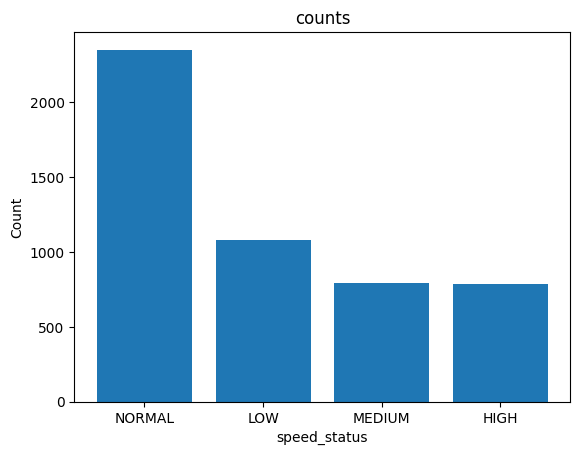

In [89]:
bargraph(b)

In [30]:
X_resampled, y_resampled=balancedataset(X,Y)

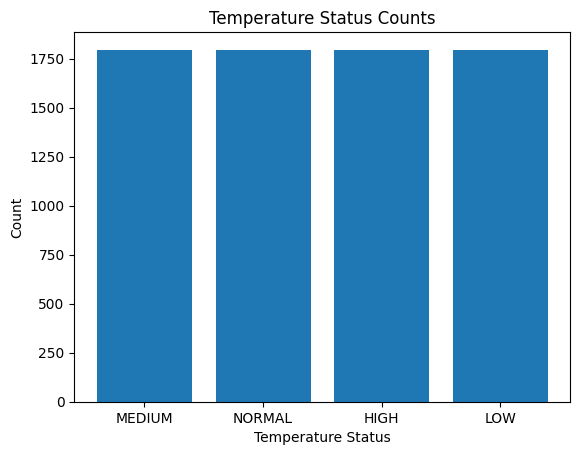

In [31]:
# Count the number of occurrences of each temperature status
counts = y_resampled.value_counts()
# Create a bar graph
plt.bar(counts.index, counts.values)
# Add title and labels
plt.title('Temperature Status Counts')
plt.xlabel('Temperature Status')
plt.ylabel('Count')
# Display the graph
plt.show()

In [32]:
len(X_resampled)

7180

In [33]:
print(y_resampled)

0       MEDIUM
1       NORMAL
2       NORMAL
3       NORMAL
4       MEDIUM
         ...  
7175    MEDIUM
7176    MEDIUM
7177    MEDIUM
7178    MEDIUM
7179    MEDIUM
Name: temperature_status, Length: 7180, dtype: object


In [34]:
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()

# Fit and transform the data column
encoded_data = le.fit_transform(y_resampled)

In [35]:
len(encoded_data)

7180

In [36]:
X_train, X_test, y_train, y_test=traintestsplit(X_resampled,encoded_data)

In [43]:
#training model
classifier = KNeighborsClassifier(n_neighbors =33, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#predicting values
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print()

#Finding Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('Accuracy score',accuracy_score(y_test, y_pred))

[[3 3]
 [3 3]
 [1 1]
 ...
 [2 2]
 [1 1]
 [2 2]]

[[457   0   7   0]
 [  0 433  23   2]
 [ 51  10 360   0]
 [  0  43   0 409]]

Accuracy score 0.9242339832869081


In [42]:
with open('tem_status.pkl', 'wb') as file:
    pickle.dump(classifier, file)

##Humdity Status

In [44]:
b='humidity_status'
X,Y=split(b,df)

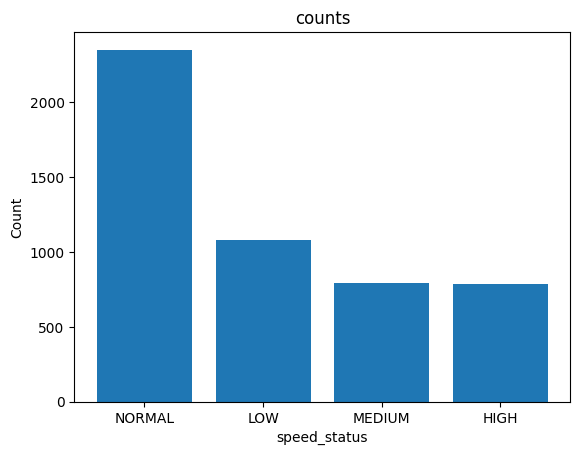

In [90]:
bargraph(b)

In [46]:
X_resampled, y_resampled=balancedataset(X,Y)

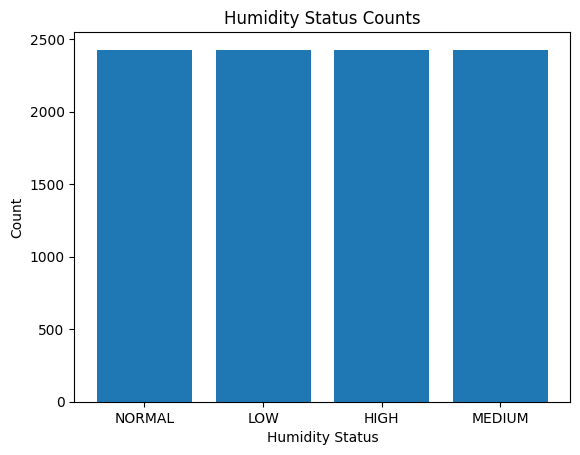

In [47]:
# Count the number of occurrences of each temperature status
counts = y_resampled.value_counts()
# Create a bar graph
plt.bar(counts.index, counts.values)
# Add title and labels
plt.title('Humidity Status Counts')
plt.xlabel('Humidity Status')
plt.ylabel('Count')
# Display the graph
plt.show()

In [48]:
len(X_resampled)

9708

In [49]:
print(y_resampled)

0       NORMAL
1          LOW
2          LOW
3         HIGH
4       NORMAL
         ...  
9703    MEDIUM
9704    MEDIUM
9705    MEDIUM
9706    MEDIUM
9707    MEDIUM
Name: humidity_status, Length: 9708, dtype: object


In [50]:
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()

# Fit and transform the data column
encoded_data = le.fit_transform(y_resampled)

In [51]:
len(encoded_data)

9708

In [52]:
X_train, X_test, y_train, y_test=traintestsplit(X_resampled,encoded_data)

In [54]:
#training model
classifier = KNeighborsClassifier(n_neighbors =9, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#predicting values
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print()

#Finding Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('Accuracy score',accuracy_score(y_test, y_pred))

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [3 3]
 [0 0]]

[[593   0  11   0]
 [  0 589  13   2]
 [ 43  25 547   0]
 [  0  42   0 562]]

Accuracy score 0.9439637412443346


In [55]:
with open('hum_status.pkl', 'wb') as file:
    pickle.dump(classifier, file)

##Vibration Status

In [56]:
b='vibrations_status'
X,Y=split(b,df)

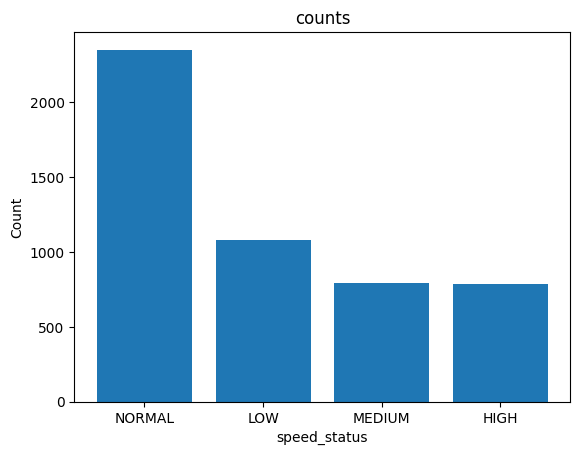

In [91]:
bargraph(b)

In [58]:
X_resampled, y_resampled=balancedataset(X,Y)

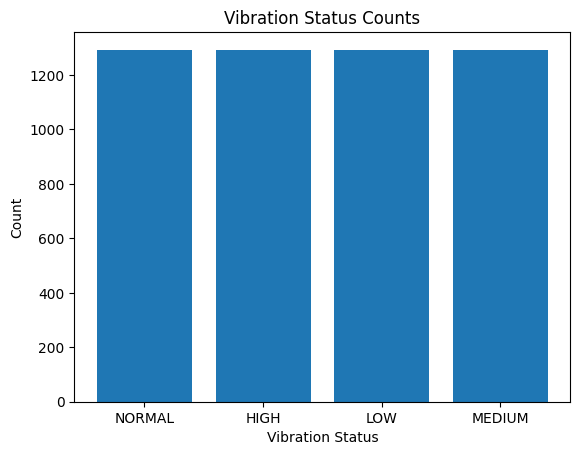

In [70]:
# Count the number of occurrences of each temperature status
counts = y_resampled.value_counts()
# Create a bar graph
plt.bar(counts.index, counts.values)
# Add title and labels
plt.title('Vibration Status Counts')
plt.xlabel('Vibration Status')
plt.ylabel('Count')
# Display the graph
plt.show()

In [60]:
len(X_resampled)

5172

In [61]:
print(y_resampled)

0       NORMAL
1         HIGH
2       NORMAL
3         HIGH
4          LOW
         ...  
5167    MEDIUM
5168    MEDIUM
5169    MEDIUM
5170    MEDIUM
5171    MEDIUM
Name: vibrations_status, Length: 5172, dtype: object


In [62]:
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()

# Fit and transform the data column
encoded_data = le.fit_transform(y_resampled)

In [63]:
len(encoded_data)

5172

In [64]:
X_train, X_test, y_train, y_test=traintestsplit(X_resampled,encoded_data)

In [68]:
#training model
classifier = KNeighborsClassifier(n_neighbors =34, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#predicting values
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print()

#Finding Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('Accuracy score',accuracy_score(y_test, y_pred))

[[0 0]
 [3 3]
 [2 2]
 ...
 [1 1]
 [0 0]
 [1 1]]

[[318   0  12   0]
 [  0 309  10  14]
 [ 19   7 306   0]
 [  0  16   0 282]]

Accuracy score 0.9396751740139211


In [69]:
with open('vib_status.pkl', 'wb') as file: 
    pickle.dump(classifier, file)

##Speed Status

In [71]:
b='speed_status'
X,Y=split(b,df)

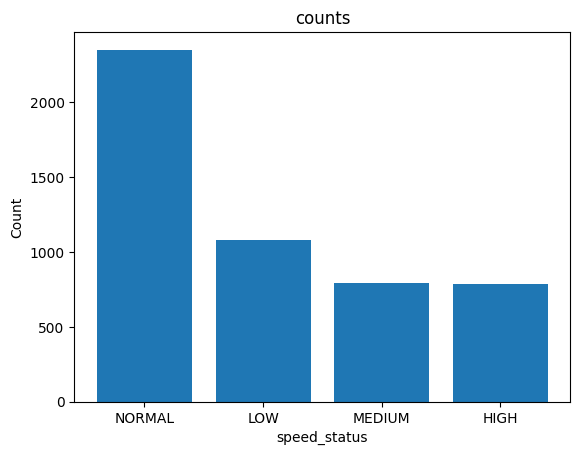

In [88]:
bargraph(b)

In [74]:
X_resampled, y_resampled=balancedataset(X,Y)

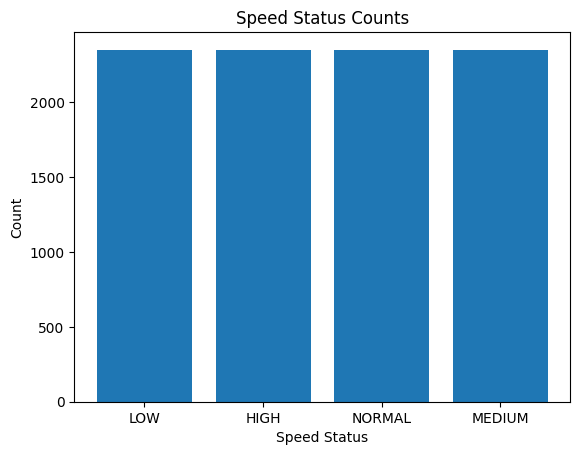

In [76]:
# Count the number of occurrences of each temperature status
counts = y_resampled.value_counts()
# Create a bar graph
plt.bar(counts.index, counts.values)
# Add title and labels
plt.title('Speed Status Counts')
plt.xlabel('Speed Status')
plt.ylabel('Count')
# Display the graph
plt.show()

In [77]:
len(X_resampled)

9396

In [78]:
print(y_resampled)

0          LOW
1         HIGH
2       NORMAL
3       NORMAL
4       NORMAL
         ...  
9391    MEDIUM
9392    MEDIUM
9393    MEDIUM
9394    MEDIUM
9395    MEDIUM
Name: speed_status, Length: 9396, dtype: object


In [79]:
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()

# Fit and transform the data column
encoded_data = le.fit_transform(y_resampled)

In [80]:
len(encoded_data)

9396

In [81]:
X_train, X_test, y_train, y_test=traintestsplit(X_resampled,encoded_data)

In [83]:
#training model
classifier = KNeighborsClassifier(n_neighbors =17, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#predicting values
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print()

#Finding Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('Accuracy score',accuracy_score(y_test, y_pred))

[[3 3]
 [0 0]
 [0 0]
 ...
 [1 1]
 [2 2]
 [0 0]]

[[559   0  32   0]
 [  0 511  39   3]
 [ 40  17 536   0]
 [  0  47   0 565]]

Accuracy score 0.924223073648361


In [85]:
with open('speed_status.pkl', 'wb') as file:
    pickle.dump(classifier, file)